In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('C:/Users/USER/Desktop/ChurnPrediction/Dataset.csv')
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)
df = df.replace({'No': 0, 'Yes': 1, 'No internet service': 0})
df['InternetService'] = df['InternetService'].replace({'Fiber optic': 2, 'DSL': 1})
df['Contract'] = df['Contract'].replace({'Two year': 24, 'One year': 12, 'Month-to-month': 1})
df['PaymentMethod'] = df['PaymentMethod'].replace({
    'Electronic check': 1,
    'Mailed check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4
})
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [ ]:
selected_features = [
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
    'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]
df = df[selected_features]

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       895
           1       0.62      0.53      0.57       303

    accuracy                           0.80      1198
   macro avg       0.73      0.71      0.72      1198
weighted avg       0.79      0.80      0.79      1198



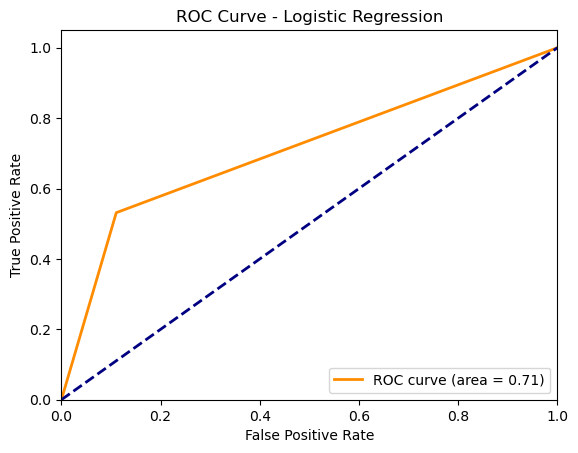

In [ ]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print("Logistic Regression:")
print(classification_report(y_test, prediction_lr))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, prediction_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       895
           1       0.59      0.49      0.54       303

    accuracy                           0.78      1198
   macro avg       0.71      0.69      0.70      1198
weighted avg       0.77      0.78      0.78      1198



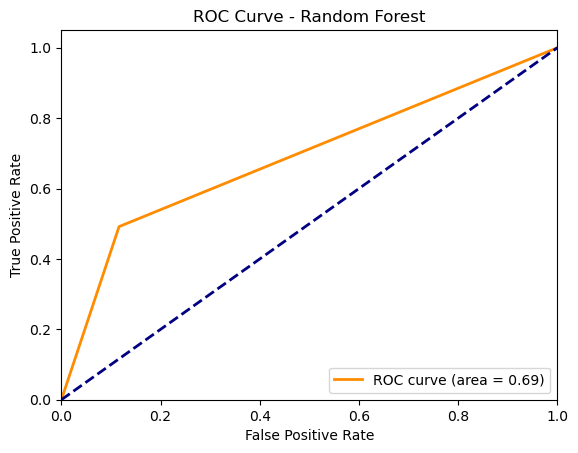

In [ ]:

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print("Random Forest:")
print(classification_report(y_test, prediction_rf))


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prediction_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Epoch 1/200


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


479/479 - 1s - 3ms/step - accuracy: 0.7590 - loss: 0.4902 - val_accuracy: 0.7780 - val_loss: 0.4513
Epoch 2/200
479/479 - 0s - 731us/step - accuracy: 0.7757 - loss: 0.4546 - val_accuracy: 0.7888 - val_loss: 0.4352
Epoch 3/200
479/479 - 0s - 799us/step - accuracy: 0.7803 - loss: 0.4457 - val_accuracy: 0.7905 - val_loss: 0.4326
Epoch 4/200
479/479 - 0s - 766us/step - accuracy: 0.7888 - loss: 0.4353 - val_accuracy: 0.7813 - val_loss: 0.4385
Epoch 5/200
479/479 - 0s - 790us/step - accuracy: 0.7822 - loss: 0.4393 - val_accuracy: 0.7988 - val_loss: 0.4288
Epoch 6/200
479/479 - 0s - 758us/step - accuracy: 0.7932 - loss: 0.4344 - val_accuracy: 0.8005 - val_loss: 0.4283
Epoch 7/200
479/479 - 0s - 723us/step - accuracy: 0.7926 - loss: 0.4352 - val_accuracy: 0.7955 - val_loss: 0.4261
Epoch 8/200
479/479 - 0s - 739us/step - accuracy: 0.7882 - loss: 0.4307 - val_accuracy: 0.7963 - val_loss: 0.4254
Epoch 9/200
479/479 - 0s - 758us/step - accuracy: 0.7899 - loss: 0.4309 - val_accuracy: 0.7963 - val_l

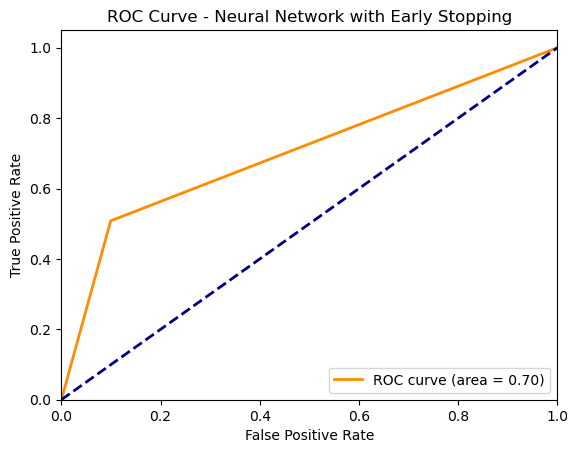

In [ ]:

from keras.callbacks import EarlyStopping
model = Sequential([
    Dense(32, activation='relu', input_dim=x_train.shape[1]),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    x_train, y_train,
    batch_size=10,
    epochs=200,
    verbose=2,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

prediction_nn = model.predict(x_test)
prediction_nn = [1 if y >= 0.5 else 0 for y in prediction_nn]

print("Neural Network:")
print(classification_report(y_test, prediction_nn))


fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, prediction_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network with Early Stopping')
plt.legend(loc="lower right")
plt.show()

In [ ]:

def count_churn(predictions):
    churn_count = sum(predictions)
    not_churn_count = len(predictions) - churn_count
    return churn_count, not_churn_count


print("Churn counts:")
print("Logistic Regression:", count_churn(prediction_lr))
print("Random Forest:", count_churn(prediction_rf))
print("Neural Network:", count_churn(prediction_nn))

Churn counts:
Logistic Regression: (260, 938)
Random Forest: (253, 945)
Neural Network: (243, 955)


In [ ]:
import joblib
joblib.dump(logistic, 'logistic_regression_model.pkl')
print("Logistic Regression model saved successfully.")

Logistic Regression model saved successfully.


In [ ]:
training_columns = x_train.columns.tolist()
joblib.dump(training_columns, 'training_columns.pkl')

['training_columns.pkl']